Data Pre-processing:
Importing all libraries, 
Importing the dataset,
Checking if there is missing data or not


In [1]:
from tkinter import *
from tkinter import messagebox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
tr=pd.read_csv("Testing.csv")
df=pd.read_csv("Training.csv")

In [3]:
df.isnull()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4916,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4917,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4918,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
tr.isnull()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
l1=['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain',
    'stomach_pain','acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue',
    'weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat',
    'irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion',
    'headache','yellowish_skin','dark_urine','nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation',
    'abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure','fluid_overload',
    'swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs','fast_heart_rate',
    'pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps',
    'bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain',
    'muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements','loss_of_balance','unsteadiness','weakness_of_one_body_side',
    'loss_of_smell','bladder_discomfort','foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches',
    'watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances',
    'receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption',
    'fluid_overload','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze']
disease=['Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
        'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Bronchial Asthma','Hypertension',
        ' Migraine','Cervical spondylosis','Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A','Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis','Common Cold','arrhythmias','Dimorphic hemmorhoids(piles)','Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis','Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis','Impetigo']

In [6]:
l2=[]
for x in range(0,len(l1)):
    l2.append(0)

In [7]:
tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'arrhythmias':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40}},inplace=True)

In [8]:
X_train = tr[l1]
y_train = tr[["prognosis"]]
np.ravel(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [9]:
df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
'Migraine':11,'Cervical spondylosis':12,
'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
'Common Cold':26,'arrhythmias':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
'(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
'Impetigo':40}},inplace=True)


In [10]:
X = df[l1]

y = df[["prognosis"]]
np.ravel(y)

array([ 0,  0,  0, ..., 38, 39, 40], dtype=int64)

100.0 %
41


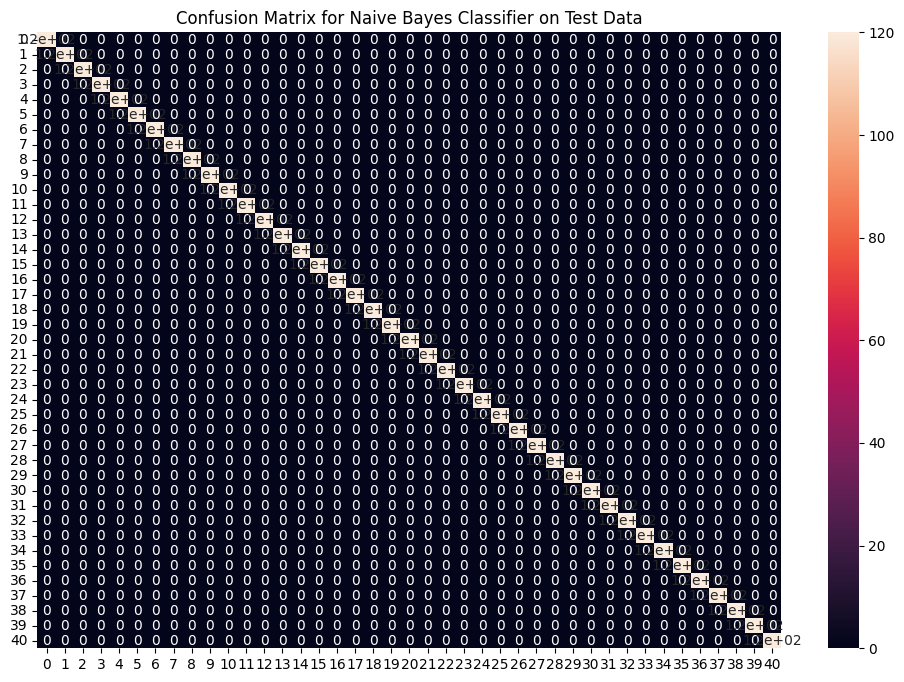

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [11]:
def message():
      if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
          messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
      else :
          NaiveBayes()
def NaiveBayes():
    from sklearn.naive_bayes import MultinomialNB
    gnb = MultinomialNB()
    gnb=gnb.fit(X,np.ravel(y))
    from sklearn.metrics import accuracy_score,confusion_matrix
    y_pred = gnb.predict(X_train)
    print(accuracy_score(y_train, y_pred)*100,'%')
    print(accuracy_score(y_train, y_pred, normalize=False))
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    y_predtest = gnb.predict(X)
    cf_matrix = confusion_matrix(y, y_predtest)
    plt.figure(figsize=(12,8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
    plt.show()

    for k in range(0,len(l1)):
        for z in psymptoms:
            if(z==l1[k]):
                l2[k]=1

    inputtest = [l2]
    predict = gnb.predict(inputtest)
    predicted=predict[0]

    h='no'
    for a in range(0,len(disease)):
        if(disease[predicted] == disease[a]):
            h='yes'
            break

    if (h=='yes'):
        t3.delete("1.0", END)
        t3.insert(END, disease[a])
    else:
        t3.delete("1.0", END)
        t3.insert(END, "No Disease")
root = Tk()
root.title("Disease Prediction From Symptoms")
root.configure()

Symptom1 = StringVar()
Symptom1.set(None)
Symptom2 = StringVar()
Symptom2.set(None)
Symptom3 = StringVar()
Symptom3.set(None)
Symptom4 = StringVar()
Symptom4.set(None)
Symptom5 = StringVar()
Symptom5.set(None)

w2 = Label(root, justify=LEFT, text="Disease Prediction From Symptoms ")
w2.config(font=("Elephant", 30))
w2.grid(row=1, column=0, columnspan=2, padx=100)

NameLb1 = Label(root, text="")
NameLb1.config(font=("Elephant", 20))
NameLb1.grid(row=5, column=1, pady=10,  sticky=W)

S1Lb = Label(root,  text="Symptom 1")
S1Lb.config(font=("Elephant", 15))
S1Lb.grid(row=7, column=1, pady=10 , sticky=W)

S2Lb = Label(root,  text="Symptom 2")
S2Lb.config(font=("Elephant", 15))
S2Lb.grid(row=8, column=1, pady=10, sticky=W)

S3Lb = Label(root,  text="Symptom 3")
S3Lb.config(font=("Elephant", 15))
S3Lb.grid(row=9, column=1, pady=10, sticky=W)

S4Lb = Label(root,  text="Symptom 4")
S4Lb.config(font=("Elephant", 15))
S4Lb.grid(row=10, column=1, pady=10, sticky=W)

S5Lb = Label(root,  text="Symptom 5")
S5Lb.config(font=("Elephant", 15))
S5Lb.grid(row=11, column=1, pady=10, sticky=W)

lr = Button(root, text="Predict",height=2, width=20, command=message)
lr.config(font=("Elephant", 15))
lr.grid(row=15, column=1,pady=20)

OPTIONS = sorted(l1)

S1En = OptionMenu(root, Symptom1,*OPTIONS)
S1En.grid(row=7, column=2)

S2En = OptionMenu(root, Symptom2,*OPTIONS)
S2En.grid(row=8, column=2)

S3En = OptionMenu(root, Symptom3,*OPTIONS)
S3En.grid(row=9, column=2)

S4En = OptionMenu(root, Symptom4,*OPTIONS)
S4En.grid(row=10, column=2)

S5En = OptionMenu(root, Symptom5,*OPTIONS)
S5En.grid(row=11, column=2)

NameLb = Label(root, text="")
NameLb.config(font=("Elephant", 20))
NameLb.grid(row=13, column=1, pady=10,  sticky=W)

NameLb = Label(root, text="")
NameLb.config(font=("Elephant", 15))
NameLb.grid(row=18, column=1, pady=10,  sticky=W)

t3 = Text(root, height=2, width=30)
t3.config(font=("Elephant", 20))
t3.grid(row=20, column=1 , padx=10)

root.mainloop()

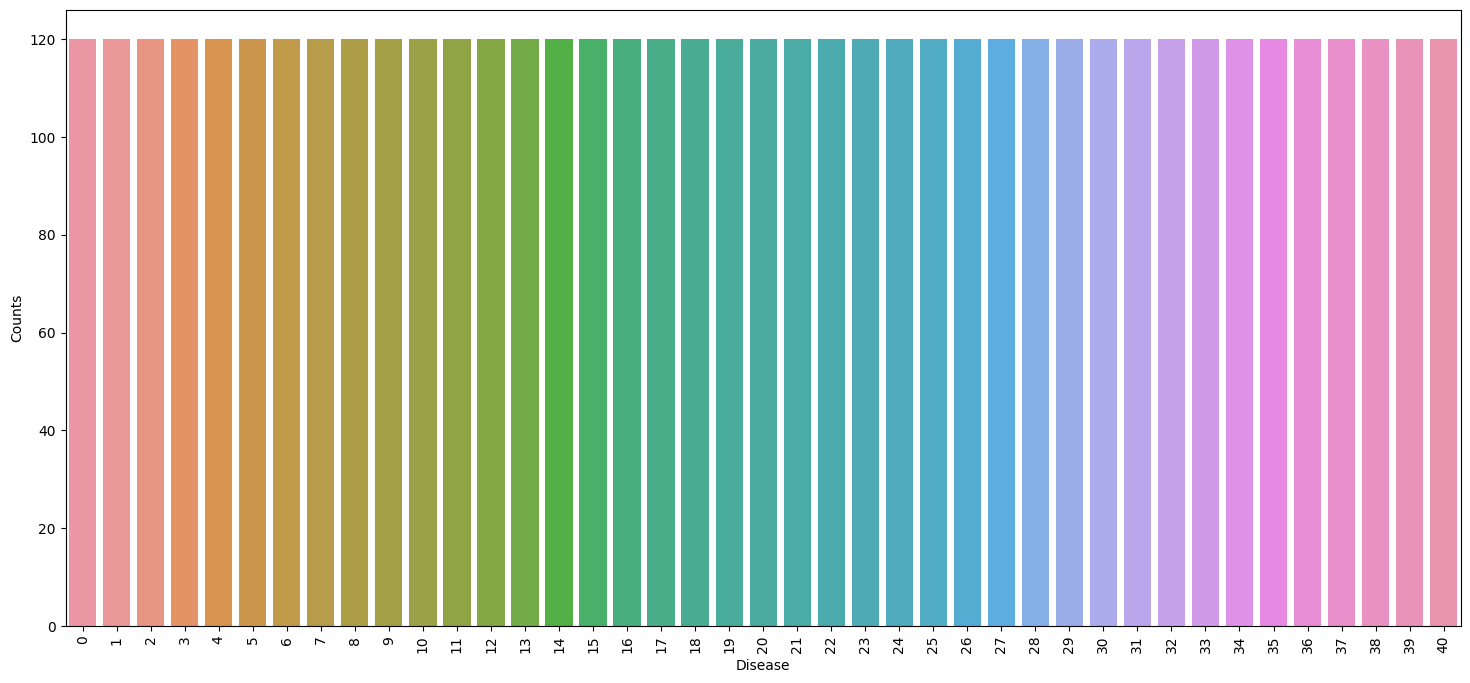

In [12]:
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()